In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
# Reading the data
df = pd.read_csv('Numerical_train.csv', index_col=0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,OverallQual,OverallCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,3,65.0,8450,0,4,0,0,7,5,...,0,0,0,0,1,0,0,0,1,0
1,20,3,80.0,9600,0,4,0,0,6,8,...,0,0,0,0,1,0,0,0,1,0
2,60,3,68.0,11250,0,3,0,0,7,5,...,0,0,0,0,1,0,0,0,1,0
3,70,3,60.0,9550,0,3,0,0,7,5,...,0,0,0,0,1,0,0,0,0,0
4,60,3,84.0,14260,0,3,0,0,8,5,...,0,0,0,0,1,0,0,0,1,0


In [3]:
y = np.log(df['SalePrice'])
x = df.drop(labels = 'SalePrice', axis=1).astype("float64")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [4]:
GBR = GradientBoostingRegressor(learning_rate= 0.1, n_estimators=1500, max_depth=2)
cv_score = cross_val_score(GBR, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print('Cross validation scores for GBR model:', np.sqrt(-cv_score).mean())

Cross validation scores for GBR model: 0.14502444445479146


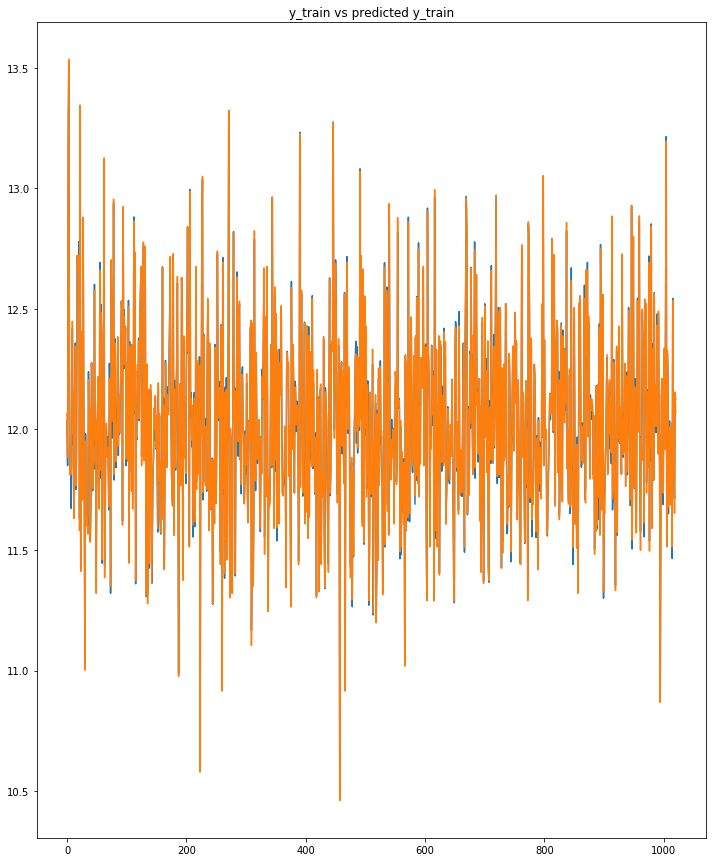

In [5]:
#visualization for y_train vs predicted y_train
GBR.fit(x_train, y_train)
pred_y_train = GBR.predict(x_train)
plt.subplots(figsize=(12,15))
plt.plot(pred_y_train)
plt.plot(y_train.values)
plt.title('y_train vs predicted y_train');

In [6]:
GBR.score(x_train, y_train)

0.9941311591622187

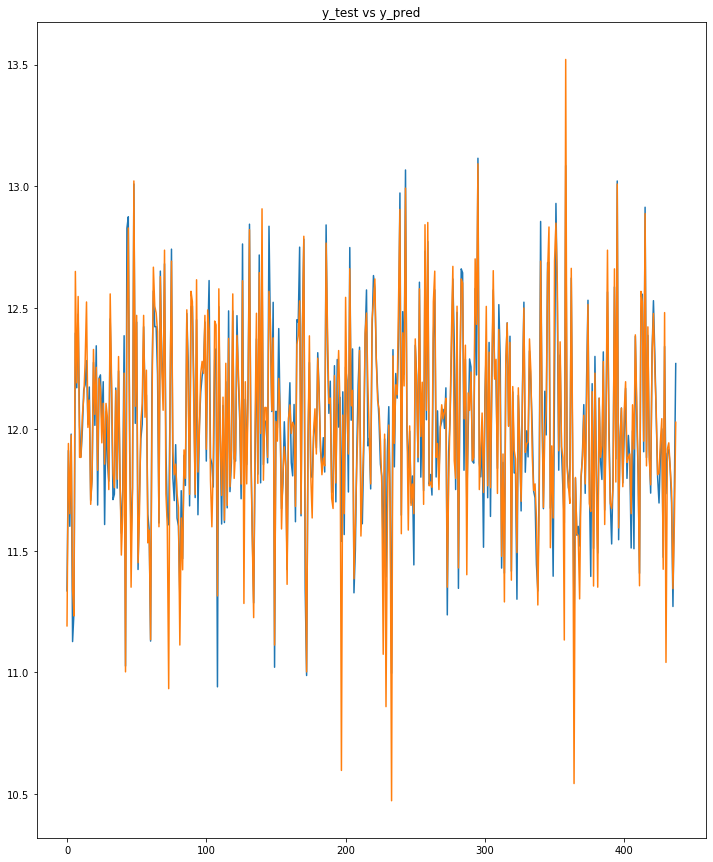

In [7]:
#visualization for y_test vs y_pred
y_pred = GBR.predict(x_test)
plt.subplots(figsize=(12,15))
plt.plot(y_pred)
plt.plot(y_test.values)
plt.title('y_test vs y_pred');

In [8]:
GBR.score(x_test, y_test)

0.8901108985498883

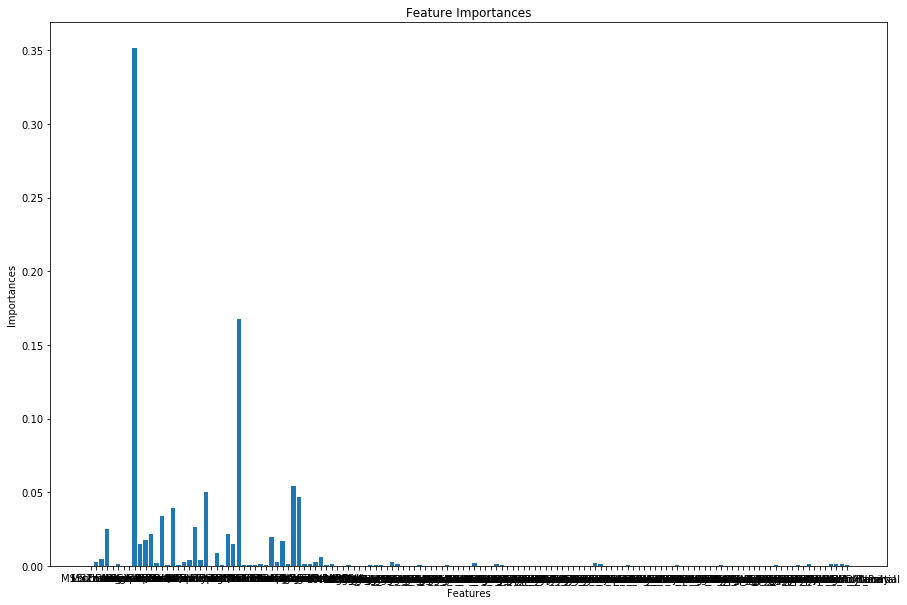

In [9]:
important_cols = x.columns[GBR.feature_importances_ > 0.0]
values = GBR.feature_importances_[GBR.feature_importances_ > 0.0]

plt.figure(figsize=(15,10))
plt.title("Feature Importances")
plt.bar(important_cols,values,align="center")
plt.xlabel('Features')
plt.ylabel('Importances');

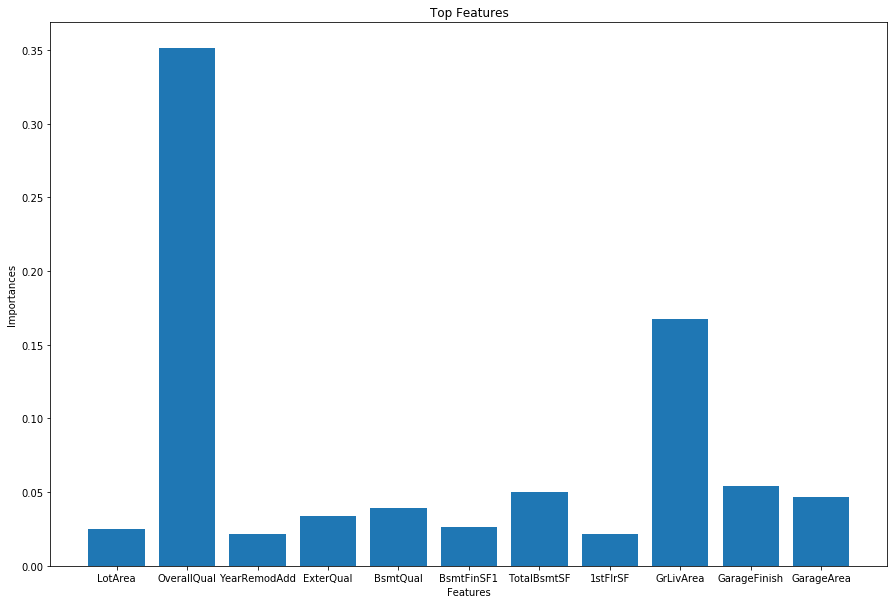

In [10]:
important_cols = x.columns[GBR.feature_importances_ > 0.02]
values = GBR.feature_importances_[GBR.feature_importances_ > 0.02]

plt.figure(figsize=(15,10))
plt.title("Top Features")
plt.bar(important_cols,values,align="center")
plt.xlabel('Features')
plt.ylabel('Importances');

In [11]:
(GBR.feature_importances_>0.02).sum()

11

In [12]:
x.loc[:,GBR.feature_importances_>0.02].columns

Index(['LotArea', 'OverallQual', 'YearRemodAdd', 'ExterQual', 'BsmtQual',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageFinish',
       'GarageArea'],
      dtype='object')

In [13]:
(GBR.feature_importances_>0.01).sum()

16

In [14]:
x.loc[:,GBR.feature_importances_>0.01].columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'ExterQual', 'BsmtQual', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'KitchenQual', 'Fireplaces', 'GarageFinish',
       'GarageArea'],
      dtype='object')

In [15]:
(GBR.feature_importances_>0.002).sum()

27

In [16]:
x.loc[:,GBR.feature_importances_>0.002].columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageFinish',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Neighborhood_Crawfor'],
      dtype='object')

In [17]:
selected_features = x.loc[:,GBR.feature_importances_>0.002].copy()

selected_features['SalePrice'] = df['SalePrice']
selected_features.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageFinish',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Neighborhood_Crawfor',
       'SalePrice'],
      dtype='object')

In [18]:
selected_features.to_csv('selected_features.csv')